In [1]:
import os
import sys
import warnings
import pandas as pd
from tqdm.notebook import tqdm

base_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
print(f"base_path: {base_path}")
sys.path.append(base_path)

base_path: /Users/jaeminiman/Documents/GitHub/sr-press


/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import express.config as config
from express.databases import SQLiteDatabase
from express.datasets import PressingDataset
from express.utils import add_names

from express import features as fs
from express import labels as ls

In [3]:
TRAIN_DB_PATH = os.path.join(base_path, "stores/train_database.sqlite")
TEST_DB_PATH = os.path.join(base_path, "stores/test_database.sqlite")

train_db = SQLiteDatabase(TRAIN_DB_PATH)
test_db = SQLiteDatabase(TEST_DB_PATH)

print("train_db:", train_db)
print("test_db:", test_db)

train_db: <express.databases.sqlite.SQLiteDatabase object at 0x28d83cb10>
test_db: <express.databases.sqlite.SQLiteDatabase object at 0x285cd15d0>


### 1 . "prev_action" data verification

In [4]:
train_dataset = PressingDataset(
    path= os.path.join(base_path, "stores", "datasets", "train"),
    xfns=["prev_action"],#["startlocation", "time", "goalscore", "defenders_in_3m_radius", "dist_opponent"], #all_features
    yfns=["counterpress"], #all_labels
    load_cached =False,
    nb_prev_actions = 1,
)

test_dataset = PressingDataset(
    path= os.path.join(base_path, "stores", "datasets", "test"),
    xfns=["prev_action"],#["startlocation", "time", "goalscore", "defenders_in_3m_radius", "dist_opponent"], #all_features
    yfns=["counterpress"], #all_labels
    load_cached =False,
    nb_prev_actions = 1
)

In [5]:
test_dataset.create(test_db)

Output()

Output()

In [6]:
import seaborn as sns

0: pass, 21: dribble

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prev_type_id_a0', ylabel='Count'>

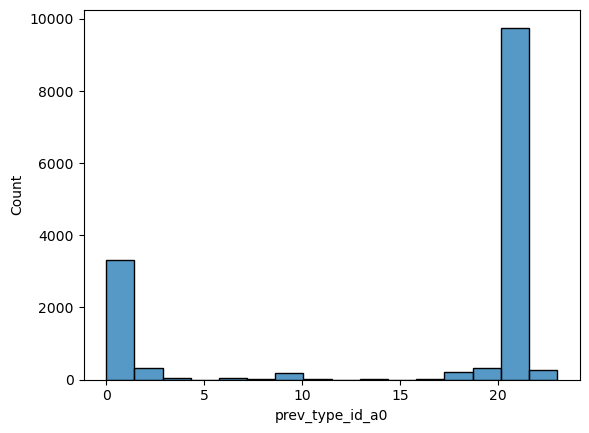

In [7]:
sns.histplot(test_dataset.features['prev_type_id_a0'])

Pressing 직전의 event_type : 대부분 패스 또는 드리블 